In [3]:
import numpy as np
import pandas as pd
import math
import operator
import sys
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
eps = np.finfo(float).eps
from numpy import log2 as log

def loaddb(filename):
            df = pd.read_csv(filename,sep=" ", header=None, names=(['Res','A','B','C','D','E','F','G']))
            df=df[['A','B','C','D','E','F','Res']].reset_index(drop=True)
            X= df[['A','B','C','D','E','F']] 
            Y= df[['Res']] 
            X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
            X_train=X_train.reset_index(drop=True)
            Y_train=Y_train.reset_index(drop=True)
            X_test=X_test.reset_index(drop=True)
            Y_test=Y_test.reset_index(drop=True)
            df=pd.concat([X_train,Y_train], axis=1)
            return df,X_train, X_test, Y_train, Y_test

In [4]:
def getEuclidDis(X1,X2):
    distance = 0
    for i in range(0,len(X2)):
                    distance += pow((X2[i] - X1[i]), 2)
    return math.sqrt(distance)
def getManhattenDis(X1,X2):
    distance = 0
    for i in range(0,len(X2)):
                    distance +=abs((X2[i] - X1[i]))
    return distance
def getCosineDis(X1,X2):
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(X2)):
        x = X1[i]
        y = X2[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return 1-float(sumxy)/(math.sqrt(sumxx)*math.sqrt(sumyy))

In [5]:
def checkNeighbours(num,df,sample):
    Neighbour_dis= []
    for i in range(0,len(df)):
        if(num==1):
             dist = getEuclidDis(df.iloc[i],sample)
        if(num==2):
             dist=getManhattenDis(df.iloc[i],sample)
        if(num==3):
            dist=getCosineDis(df.iloc[i],sample)

        Neighbour_dis.append((df.iloc[i], dist))
    return Neighbour_dis
 

In [6]:
def selectbestk(myneighbour,k):
    myneighbour.sort(key=operator.itemgetter(1))
    bestk=[]
    for i in range(0,k):
        bestk.append(myneighbour[i][0])
    return bestk
    

In [7]:
def predict( kneighbours,k):


        classVotes = {}
        for x in range(len(kneighbours)):
            response = kneighbours[x][-1]
            if response in classVotes:
                classVotes[response] += 1
            else:
                classVotes[response] = 1
        sortedVotes = sorted(classVotes.iteritems(), key=operator.itemgetter(1), reverse=True)
        return sortedVotes[0][0]

    

In [8]:
def calculate_recall_precision(original,res):
        TP=0
        FP=0
        TN= 0
        FN= 0
        f1_score=0
        for i in range(0, len(original)):

                if res[i] == 1:
                    if res[i] == original[i]:
                        TP+= 1
                    else:
                        FP+= 1
                else:
                    if res[i] == original[i]:
                        TN+= 1
                    else:
                        FN+= 1

        precision=0
        recall=0
        if(TP!=0 or TN!=0):
                accuracy = (TP+TN)*1.0/(TP + TN +FP +FN)
        if(TP!=0):
                precision = TP*1.0/(TP + FP)
                recall = TP*1.0/(TP + FN)
                f1_score = 2 / ((1 / precision) + (1 / recall))
               
        return accuracy*100, precision*100, recall*100,f1_score*100
    

In [9]:
def show_result(num,filename,k):
    df,X_train, X_test, Y_train, Y_test=loaddb(filename)
    res=[]
    TP={}
    Pred={}
    Real={}
#     if(len(sys.argv)>1):
#                 Test_Filename=sys.argv[1]
#                 testdf = pd.read_csv(Test_Filename,sep=" ", header=None, names=(['Res','A','B','C','D','E','F','G']))
#                 X_test=testdf[['A','B','C','D','E','F']]  
#                 Y_test=testdf[['Res']]
    for i in range(0,len(X_test)):
        test=X_test.iloc[i]
        neighbours = checkNeighbours(num,df,test)
        kneighbours=selectbestk(neighbours,k)
        p=predict(kneighbours,test)
        res.append(p)            
    test_array=np.array(Y_test['Res'])
    attrib=Y_test['Res'].unique()

    accuracy, precision, recall,f1_score = calculate_recall_precision(test_array,res)
    return accuracy

<===============================Graph for Robot1===============================>


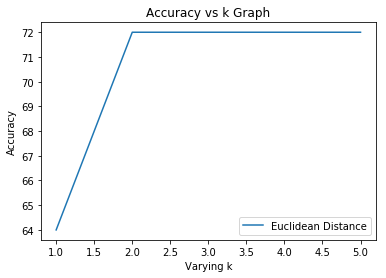

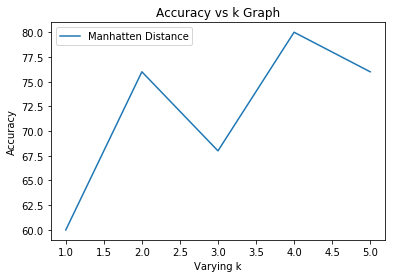

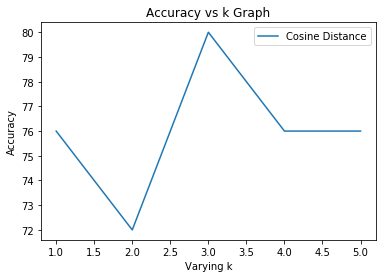

<===============================Graph for Robot2===============================>


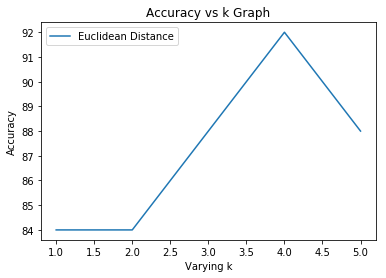

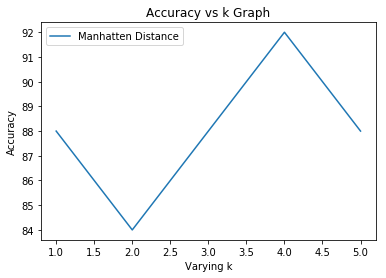

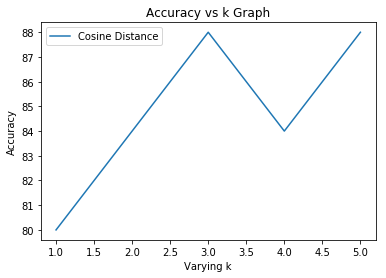

In [10]:
nodes = [1,2,3,4,5]

def show(num,name):
    if(name==1):
        filename='/home/neelesh/Downloads/RobotDataset/Robot1'
    else:
        filename='/home/neelesh/Downloads/RobotDataset/Robot2'
    Test_acc1=[]

    for i in range(1,6):
        A1=show_result(num,filename,i)
        Test_acc1.append(A1)
    return Test_acc1
def robot(num,pos):
        plt.title('Accuracy vs k Graph')
        if(pos==1):
            Test=show(1,num)
            plt.plot(nodes,Test, label = 'Euclidean Distance') 
        elif(pos==2):    
            Test=show(2,num)
            plt.plot(nodes,Test, label = 'Manhatten Distance')
        else:    
            Test=show(3,num)
            plt.plot(nodes,Test, label = 'Cosine Distance') 
        plt.legend()
        plt.xlabel('Varying k')
        plt.ylabel('Accuracy')
        plt.show()
print "<===============================Graph for Robot1===============================>"   
robot(1,1)
robot(1,2)
robot(1,3)
print "<===============================Graph for Robot2===============================>"
robot(2,1)
robot(2,2)
robot(2,3)

# Observations:

Clearly from the above graphs it can be seen that whenever k is assigned an even number its result is not good since with even number there can be ambiguity to which class the test sample lies if k/2 neighbours lies in one class and remaining in other.

Euclidean distance gives better result for low dimensional vectors.